<H1> AUSTRALIA WEATHER PREDICTION

With a dataset regarding weather in Australia and its indicators, we will predict whether or not it will be rain tomorrow by looking at that day's data.

The dataset contains the following features:
| Columns | Description |
| - | - |
| Date | The date of observation |
| Location | The common name of the location of the weather station |
| MinTemp | The minimum temperature in degrees celsius |
| MaxTemp | The maximum temperature in degrees celsius |
| Rainfall | The amount of rainfall recorded for the day in mm |
| Evaporation | The so-called Class A pan evaporation (mm) in the 24 hours to 9am |
| Sunshine | The number of hours of bright sunshine in the day |
| WindGustDir | The direction of the strongest wind gust in the 24 hours to midnight |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight |
| WindDir9am | Direction of the wind at 9am |
| WindDir3pm | Direction of the wind at 3pm |
| WindSpeed9am | Wind speed (km/hr) averaged over 10 minutes prior to 9am |
| WindSpeed3pm | Wind speed (km/hr) averaged over 10 minutes prior to 3pm |
| Humidity9am | Humidity (percent) at 9am |
| Humidity3pm | Humidity (percent) at 3pm |
| Pressure9am | Atmospheric pressure (hpa) reduced to mean sea level at 9am |
| Pressure3pm | Atmospheric pressure (hpa) reduced to mean sea level at 3pm |
| Cloud9am | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast |
| Cloud3pm | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values |
| Temp9am | Temperature (degrees C) at 9am |
| Temp3pm | Temperature (degrees C) at 3pm |
| RainToday | Boolean: Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No |
| RainTomorrow | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk" |

## 1. IMPORT NEEDED LIBRARY

## Library for Data Pre-processing & Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Library for Modelling

In [2]:
from sklearn.compose import ColumnTransformer, make_column_selector # Transformer different method on different types of variables
from sklearn.impute import SimpleImputer # Impute on null - values
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config

set_config(transform_output="pandas")

## 2. DATA PRE-PROCESSING

#### 2.1 Load the Australia weather dataset

In [3]:
data = pd.read_csv('AUSweather.csv') # Load the dataset
data.columns = [i.lower() for i in data.columns] # Lower columns name for convenient

#### 2.2 Some exploratory analysis

In [4]:
# Initial look at the dataset
data.head()

date location  mintemp  maxtemp  rainfall  evaporation  sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  windgustdir  windgustspeed winddir9am  ... humidity9am  humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   pressure9am  pressure3pm  cloud9am  cloud3pm  temp9am  temp3pm  raintoday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   raintomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
# Let's see how many rows and columns we have
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

#### 2.2.1 Drop high-percentage null values before doing any analysis and processing
<br>**$\rightarrow$** Not to waste time to explore too much effort on uninformative features

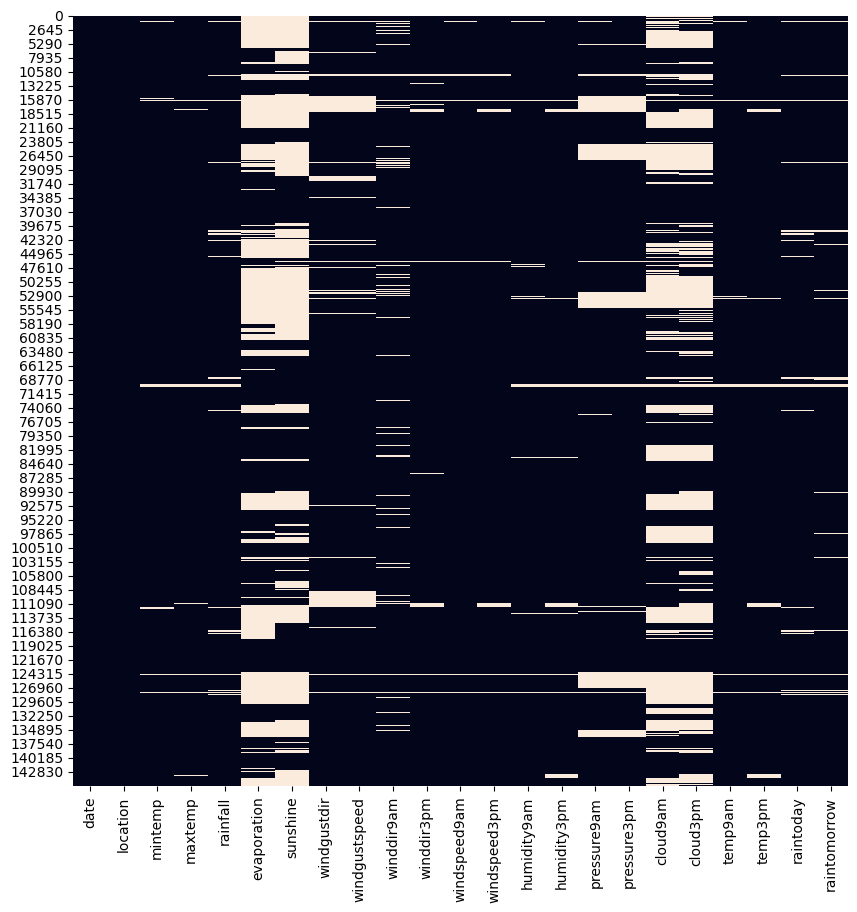

In [7]:
# Is there any null values and how they distributed?
f, ax = plt.subplots(figsize= (10, 10))
ax = sns.heatmap(data.isnull(), cbar= False)

plt.show()

- Evaporation, sunshine, cloud9am and cloud3pm contain null values nearly half of all the values
<br>
- Target variable ***Rain Tomorrow*** contain null values

$\rightarrow$ Let's drop rows where ***Rain Tomorrow*** is null

In [8]:
data = data.dropna(subset= ['raintomorrow'], axis= 0)

- Let's see how many percent the null values is in each column

In [9]:
null_value = pd.DataFrame((data.isnull().sum().sort_values(ascending= False)*100/len(data)).reset_index())
null_value_to_drop = list(null_value['index'].head(4))
print(null_value_to_drop, null_value)

['sunshine', 'evaporation', 'cloud3pm', 'cloud9am']             index          0
0        sunshine  47.692924
1     evaporation  42.789026
2        cloud3pm  40.152469
3        cloud9am  37.735332
4     pressure9am   9.855619
5     pressure3pm   9.832411
6      winddir9am   7.041838
7     windgustdir   6.561504
8   windgustspeed   6.519308
9      winddir3pm   2.656952
10    humidity3pm   2.538803
11        temp3pm   1.917113
12   windspeed3pm   1.849599
13    humidity9am   1.247600
14       rainfall   0.988797
15      raintoday   0.988797
16   windspeed9am   0.948007
17        temp9am   0.635756
18        mintemp   0.447983
19        maxtemp   0.226453
20           date   0.000000
21       location   0.000000
22   raintomorrow   0.000000


Wow, as we've seen before. These 4 columns have a huge percentage of null values.
<br>
$\rightarrow$ Let's drop them! More than 30% of null values could somehow effect our model accuracy eventhough we impute a 'missing_value' label for them.

In [10]:
data = data.drop(null_value_to_drop, axis= 1)

Also, if an example contains more than 5 null features

In [11]:
(data.isnull().sum(axis= 1) >= 5).value_counts()

False    138075
True       4118
dtype: int64

$\rightarrow$ Alright, just drop these 4118 examples!

In [12]:
data = data[data.isnull().sum(axis= 1) < 5]

#### 2.2.2 Statistical look

In [13]:
# Also, we want to convert the target variable to binary for modelling and analysis purposes
data['raintomorrow'] = [1 if i == 'Yes' else 0 for i in data['raintomorrow']]

In [14]:
# Use a copy of the dataset for analysis
data_for_analysis = data.copy()

In [15]:
data_for_analysis.describe().round(2)

mintemp    maxtemp   rainfall  windgustspeed  windspeed9am  \
count  137938.00  138002.00  136992.00      132347.00     137936.00   
mean       12.19      23.26       2.33          39.97         14.13   
std         6.42       7.12       8.40          13.57          8.80   
min        -8.50      -4.80       0.00           6.00          0.00   
25%         7.60      17.90       0.00          31.00          7.00   
50%        12.00      22.70       0.00          39.00         13.00   
75%        16.90      28.30       0.60          48.00         19.00   
max        33.90      48.10     371.00         135.00         87.00   

       windspeed3pm  humidity9am  humidity3pm  pressure9am  pressure3pm  \
count     137973.00    137030.00     136517.0    127101.00    127165.00   
mean          18.74        68.69         51.4      1017.65      1015.25   
std            8.74        19.10         20.8         7.11         7.04   
min            0.00         0.00          0.0       980.50       977.10   
25%           13.00        57.00         36.0      1012.90      1010.40   
50%           19.00        70.00         52.0      1017.60      1015.20   
75%           24.00        83.00         66.0      1022.40      1020.00   
max           87.00       100.00        100.0      1041.00      1039.60   

         temp9am    temp3pm  raintomorrow  
count  137815.00  137328.00     138075.00  
mean       16.99      21.70          0.22  
std         6.52       6.95          0.42  
min        -7.20      -5.40          0.00  
25%        12.20      16.60          0.00  
50%        16.70      21.10          0.00  
75%        21.60      26.40          0.00  
max        40.20      46.70          1.00

#### 2.2.2.1 Outlier detector using IQR

In [16]:
def IQR(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    upper = df[variable].quantile(0.75) + (IQR * 1.5)
    lower = df[variable].quantile(0.25) - (IQR * 1.5)
    return upper, lower

In [17]:
for var in data_for_analysis:
    if data_for_analysis[var].dtype == 'float':
        upper, lower = IQR(data_for_analysis, var)
        if data_for_analysis[var].max() > (upper + (upper - lower) * 1.5):
            print(var, data_for_analysis[var].max())

rainfall 371.0


Look at the **rainfall** feature! It's a huge distance between 75% quantile and the Maximum, also more than 1.5 times the IQR

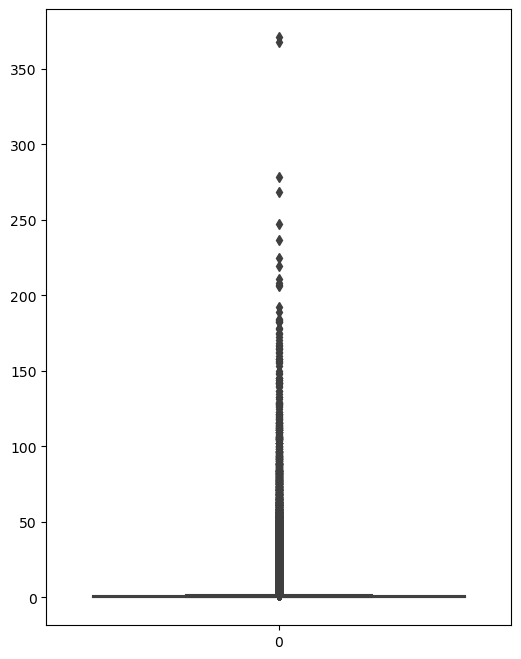

In [18]:
f, ax = plt.subplots(figsize= (6,8))
sns.boxplot(data= data_for_analysis.rainfall, ax= ax)

plt.show()

In [19]:
rainfall_upper, rainfall_lower = IQR(data_for_analysis, 'rainfall')

In [20]:
data_for_analysis['rainfall_outliers'] = [0 if val < rainfall_upper else 1 for val in data.rainfall.values]

0    0.792178
1    0.207822
Name: rainfall_outliers, dtype: float64
0    0.777338
1    0.222662
Name: raintomorrow, dtype: float64


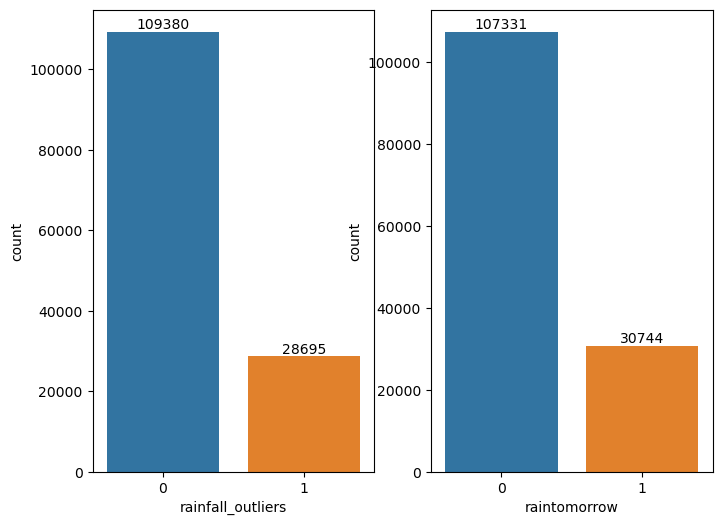

In [21]:
f, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (8,6))
ax1 = sns.countplot(data= data_for_analysis, x= 'rainfall_outliers', ax= ax[0])
ax1.bar_label(ax1.containers[0])

ax2 = sns.countplot(data= data_for_analysis, x= 'raintomorrow', ax= ax[1])
ax2.bar_label(ax2.containers[0])

print(data_for_analysis.rainfall_outliers.value_counts(normalize= True))
print(data_for_analysis.raintomorrow.value_counts(normalize= True))

plt.show()

$\rightarrow$ More than 20% of the **rainfall** feature is lower than Upper boundary, which is usually detected as outliers
<br>But let's try some visualizations to find out what kind of outliers 20% are

As you can see, the proportion of **rainfall_outliers** is approximately equals to ***target variable*** **raintomorrow**.
<br>$\rightarrow$ Is there any chance for a high rainfall indicator (>1), the more probability tomorrow will rain?

                   raintomorrow  rainfall_outliers
raintomorrow           1.000000           0.315034
rainfall_outliers      0.315034           1.000000


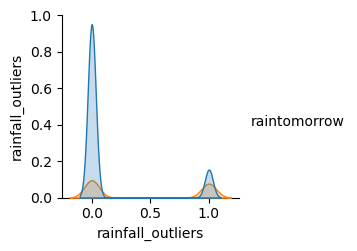

In [23]:
sns.pairplot(data=data_for_analysis[['raintomorrow', 'rainfall_outliers']],
             hue= 'raintomorrow')
print(data_for_analysis[['raintomorrow', 'rainfall_outliers']].corr())
plt.show()

Alright, seems like the rainfall outlier itself not effect tomorrow weather. Rain tomorrow is distributed almost equally even with higher rainfall index.

#### 2.2.2.2 Other variables distribution

In [24]:
categorical = [var for var in data_for_analysis.drop('date', axis= 1).columns if data_for_analysis[var].dtype == 'O']
numeric = [var for var in data_for_analysis.columns if data_for_analysis[var].dtype == 'float']

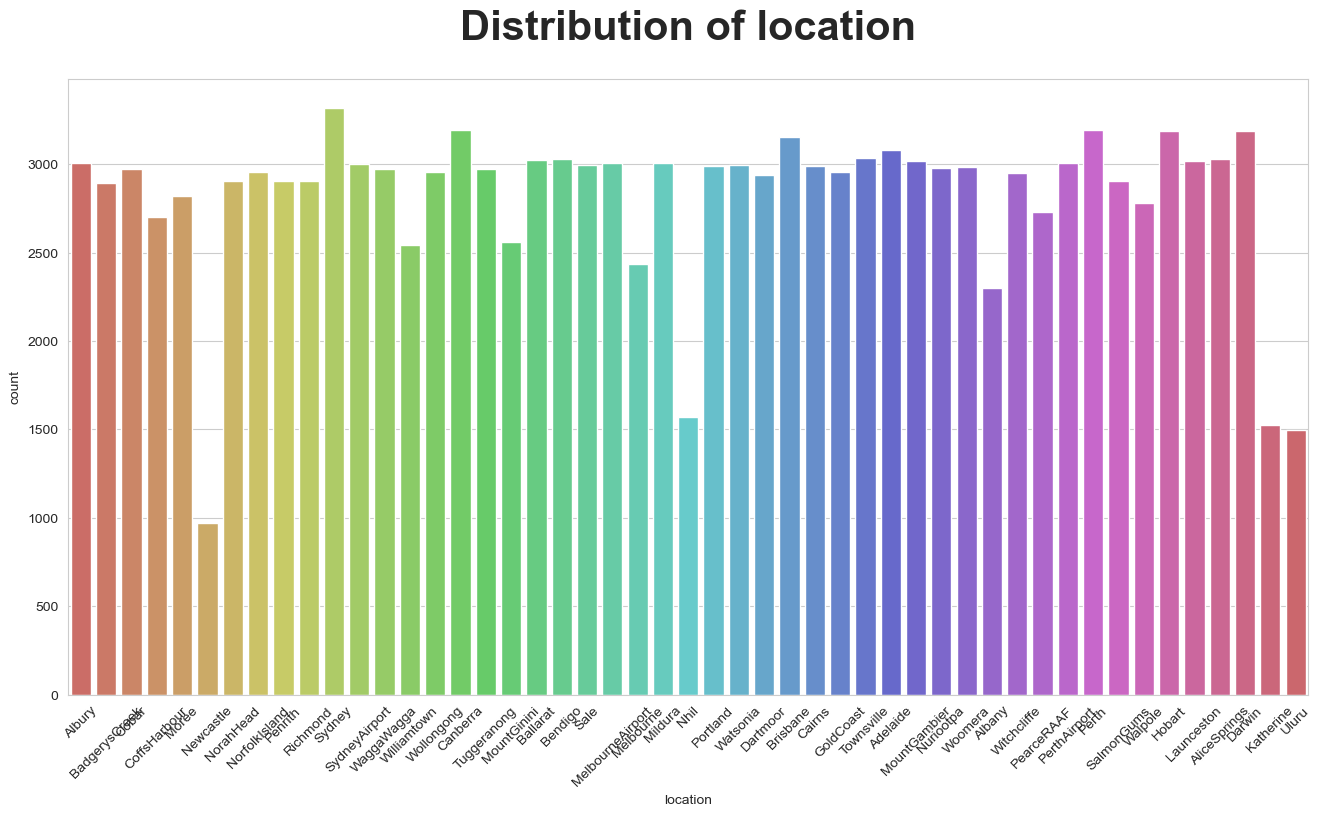

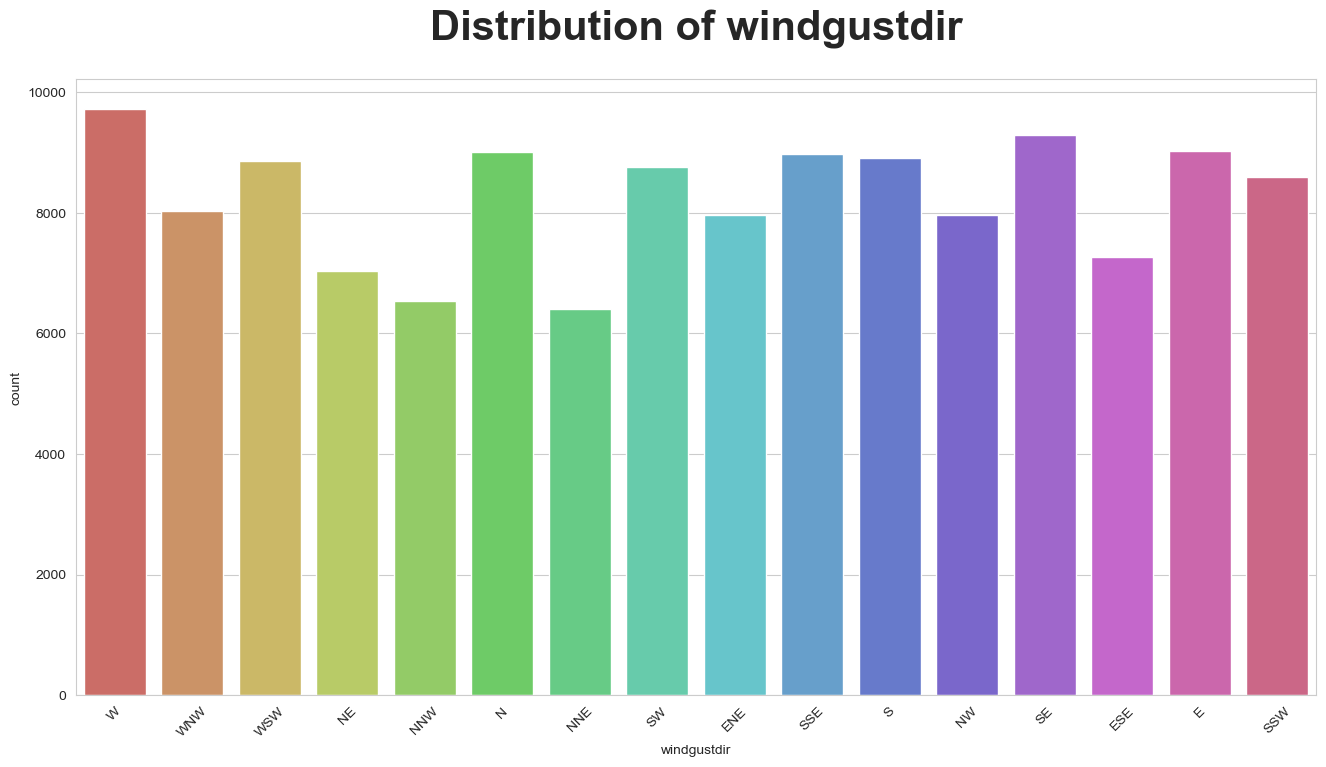

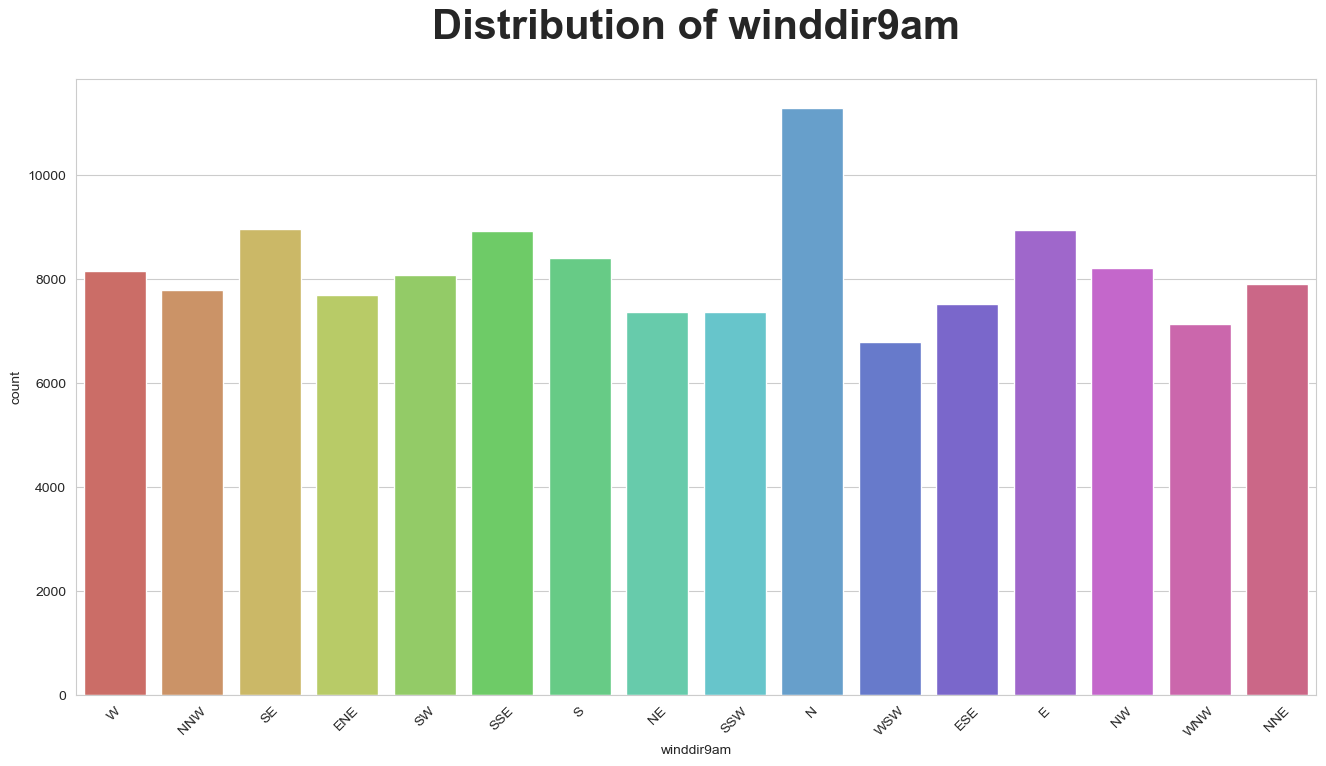

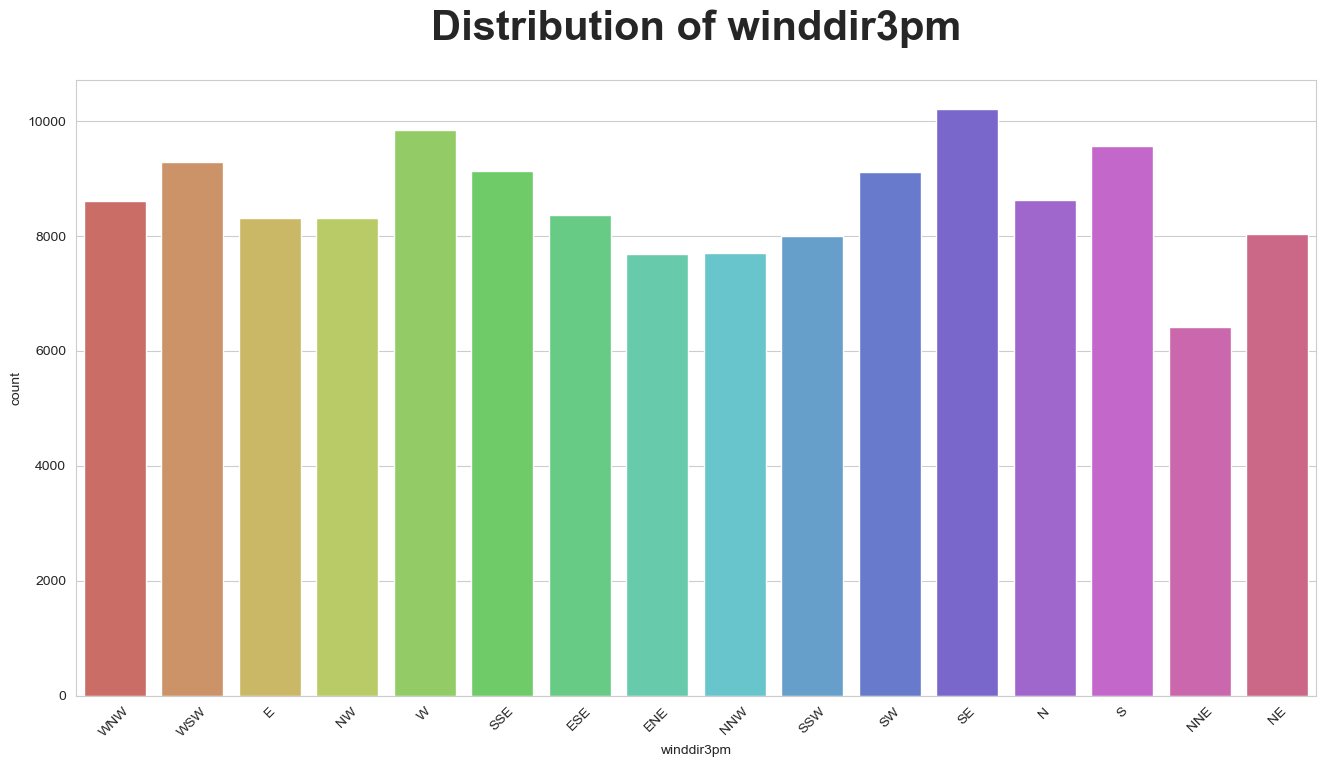

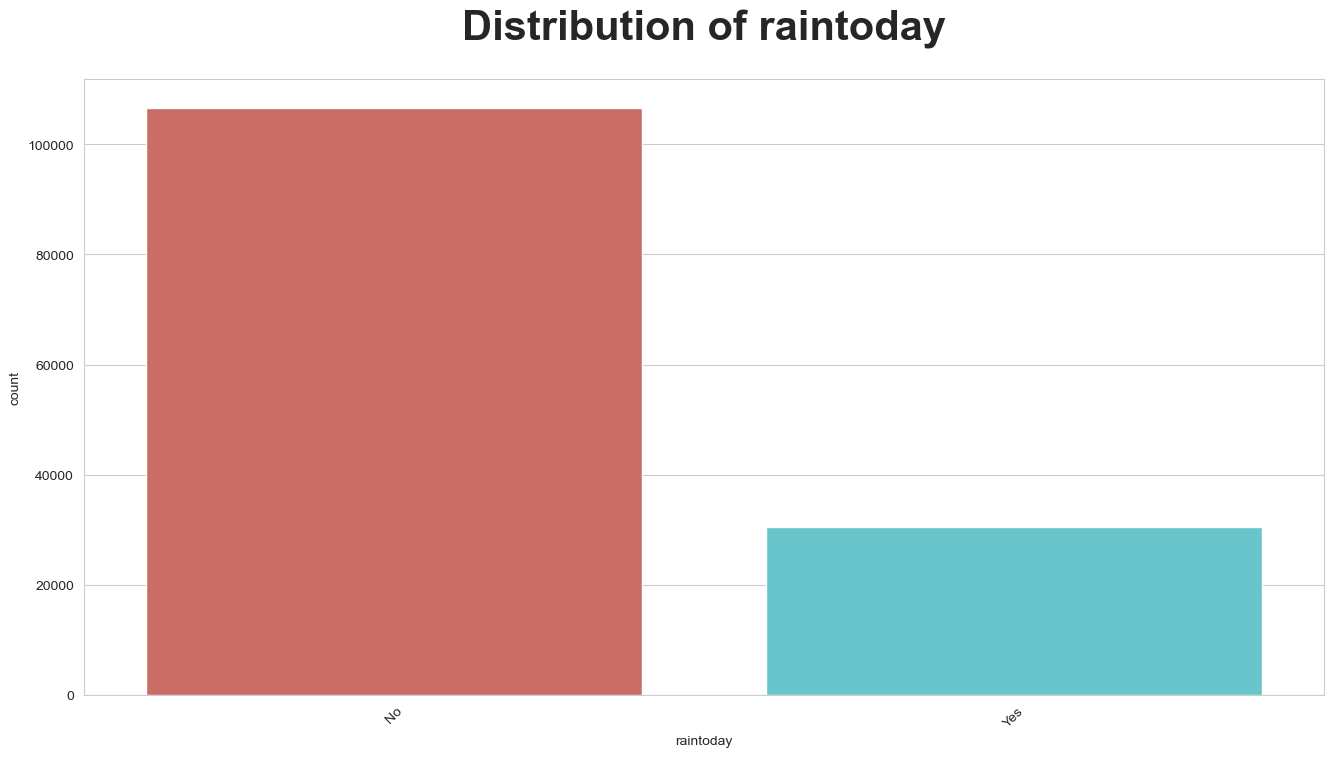

In [25]:
# Distribution of Categorical variables

for i in categorical:
    plt.figure(figsize=(16,8))
    sns.set_style("whitegrid")
    plt.title(f'Distribution of {i}', fontsize=30, fontweight='bold', y=1.05,)
    sns.countplot(x= i, data= data_for_analysis.drop('date', axis= 1), palette="hls")
    plt.xticks(rotation= 45)
    plt.show()

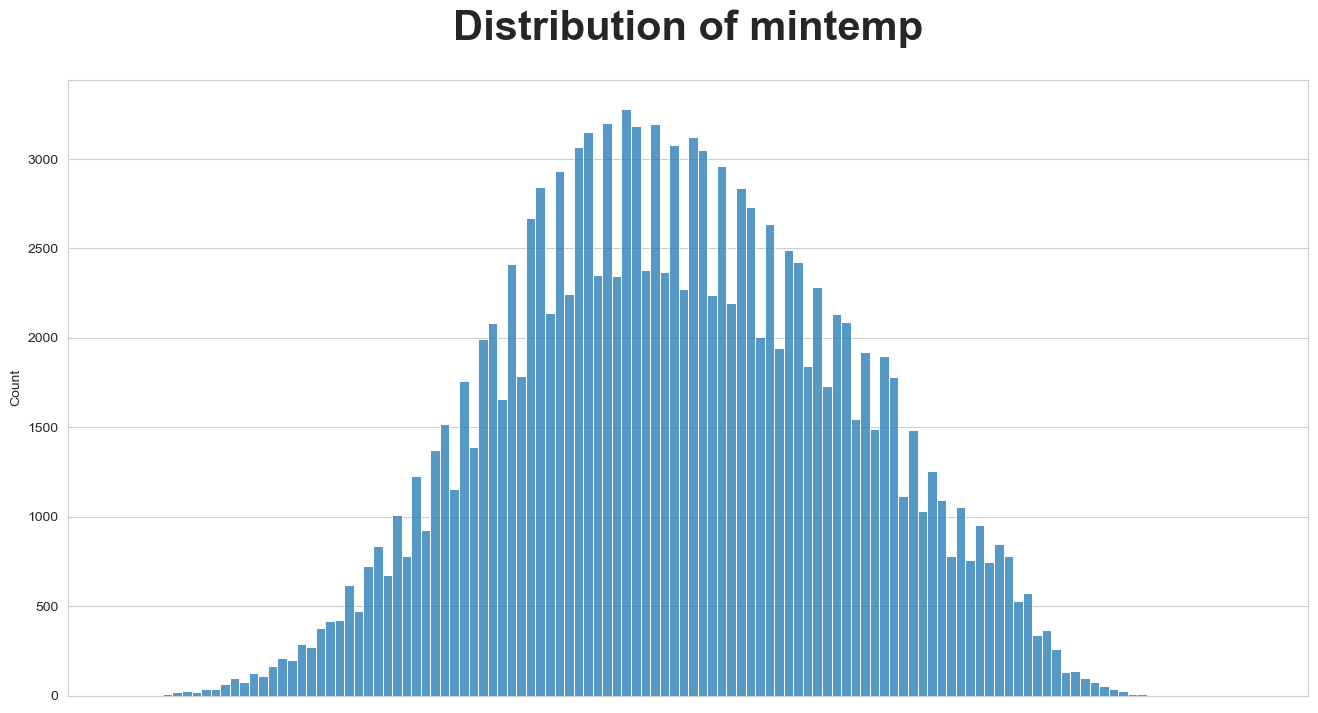

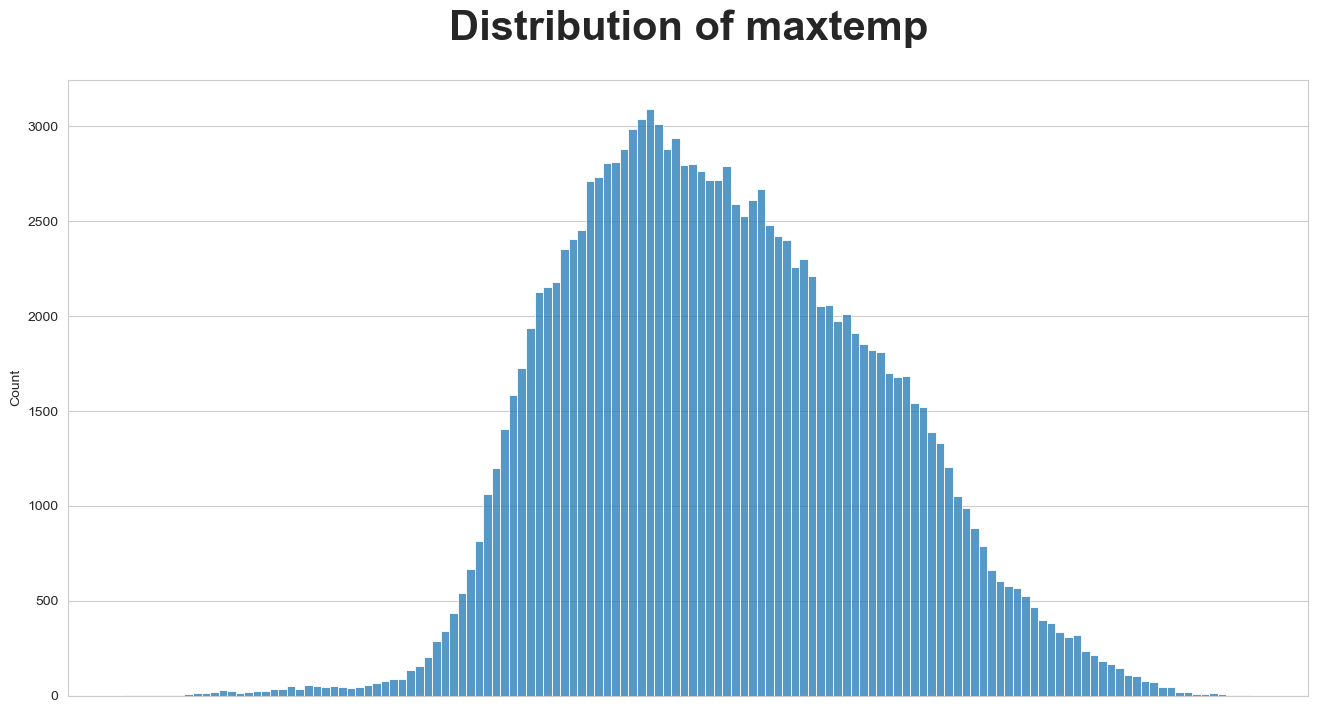

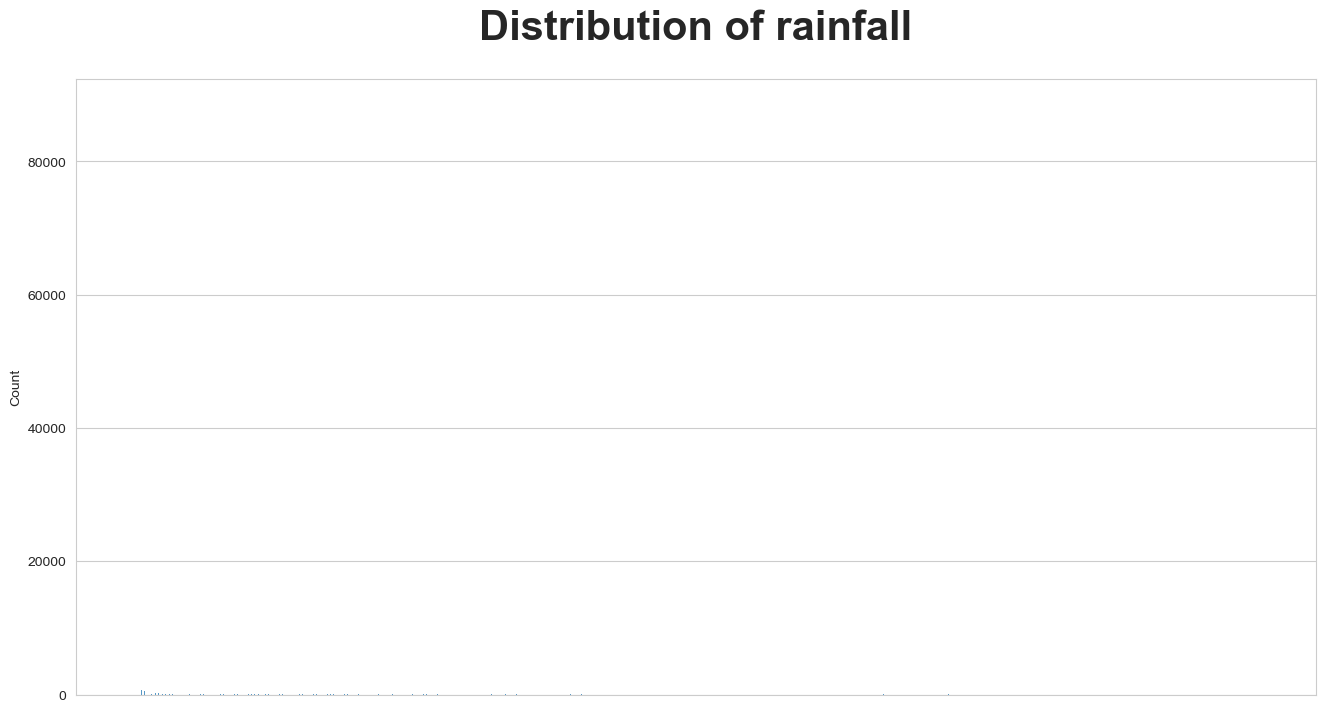

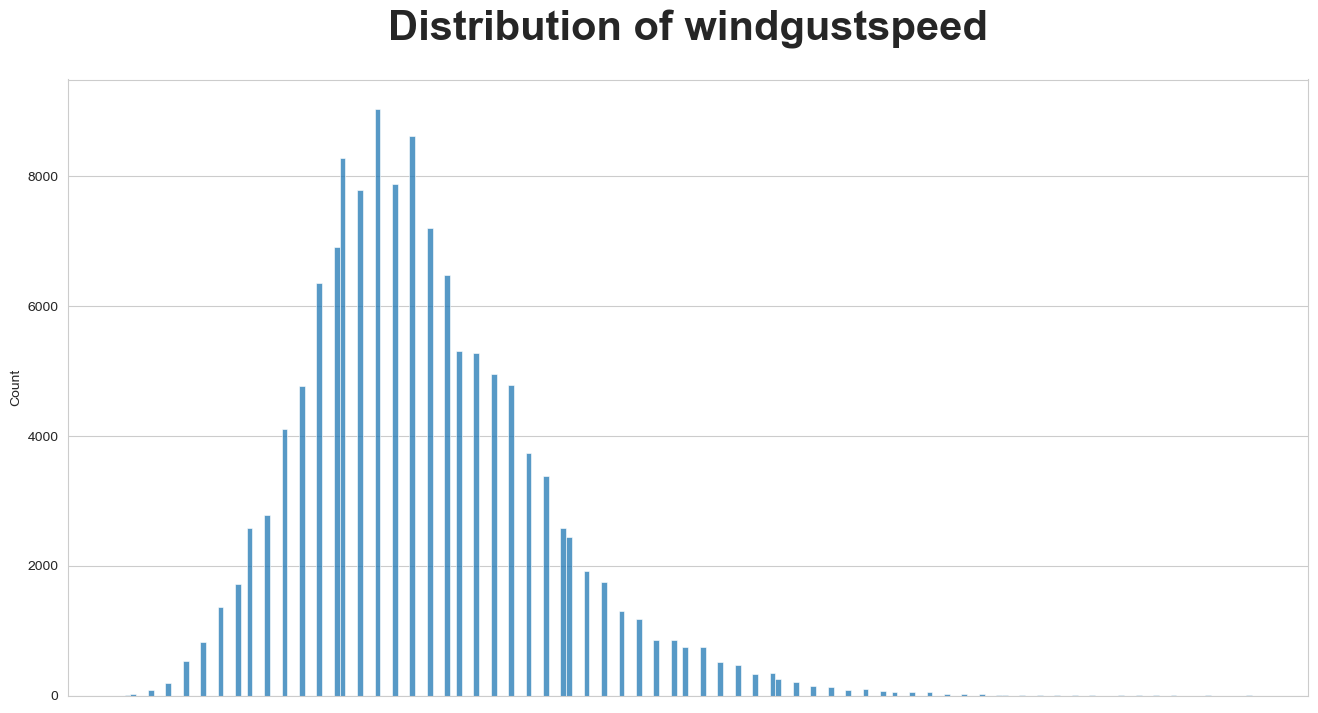

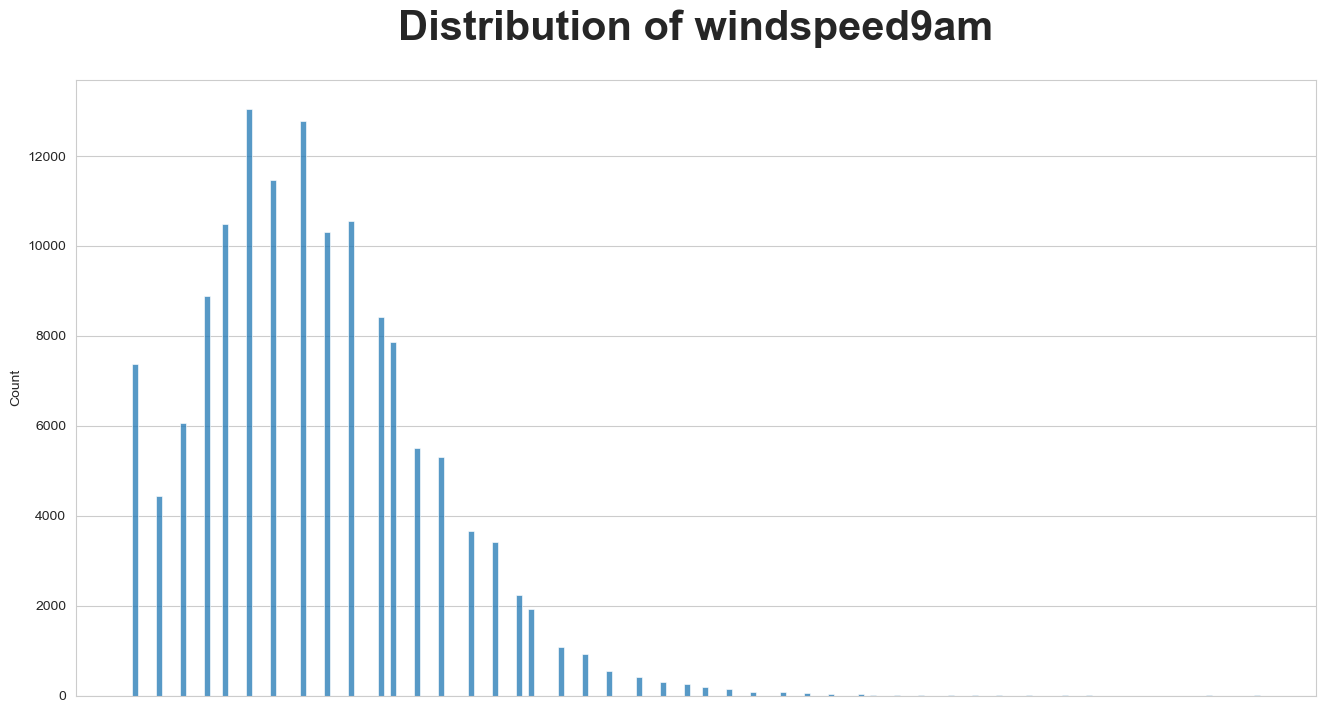

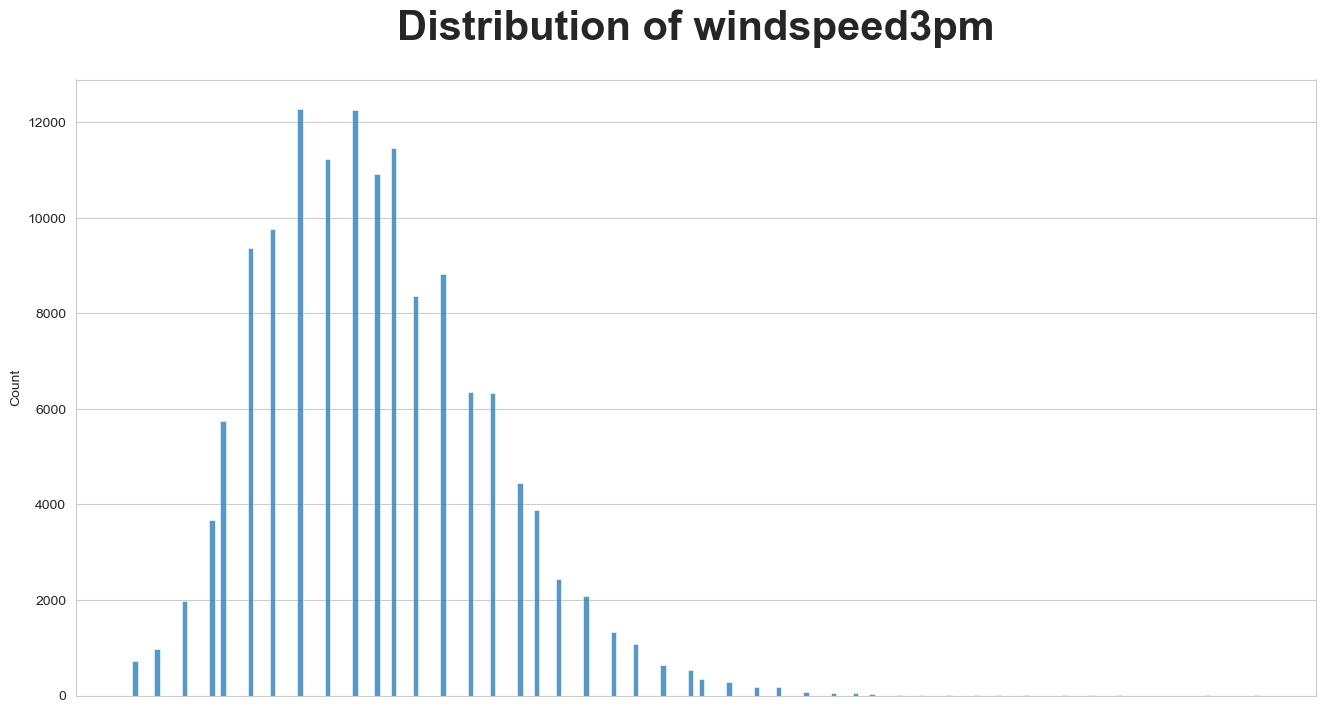

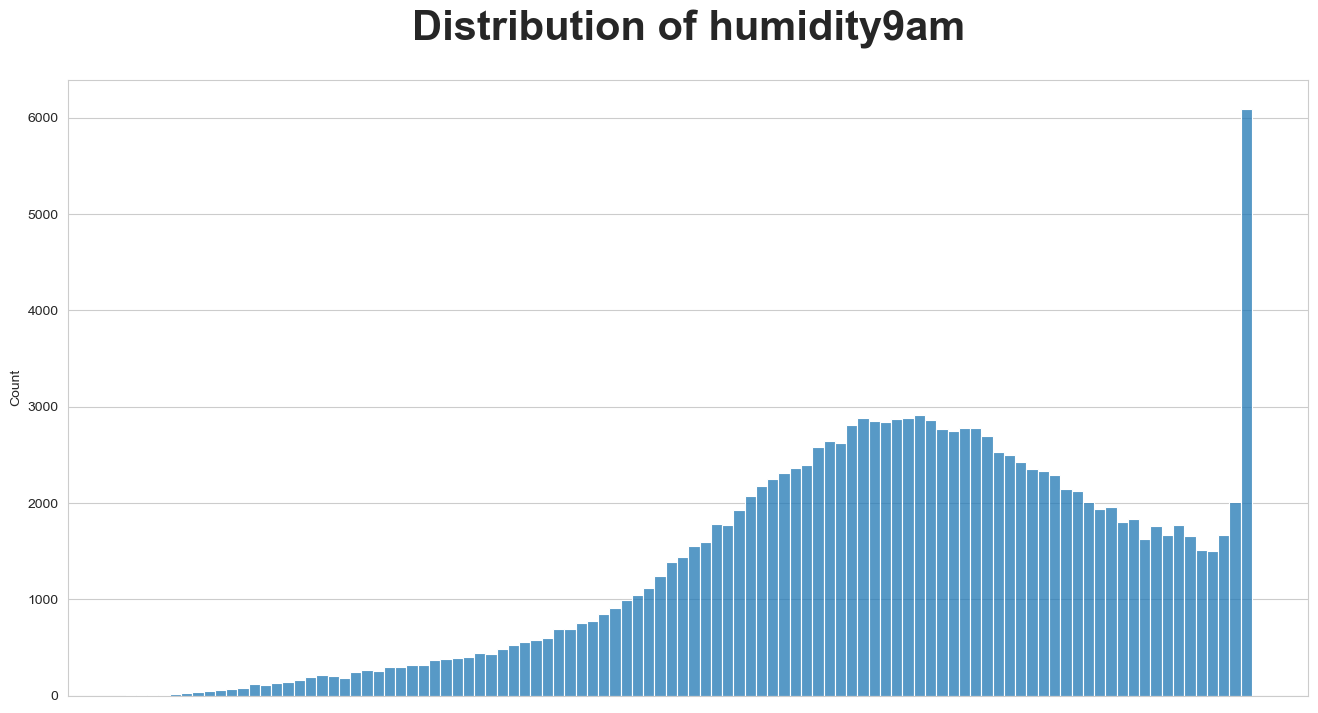

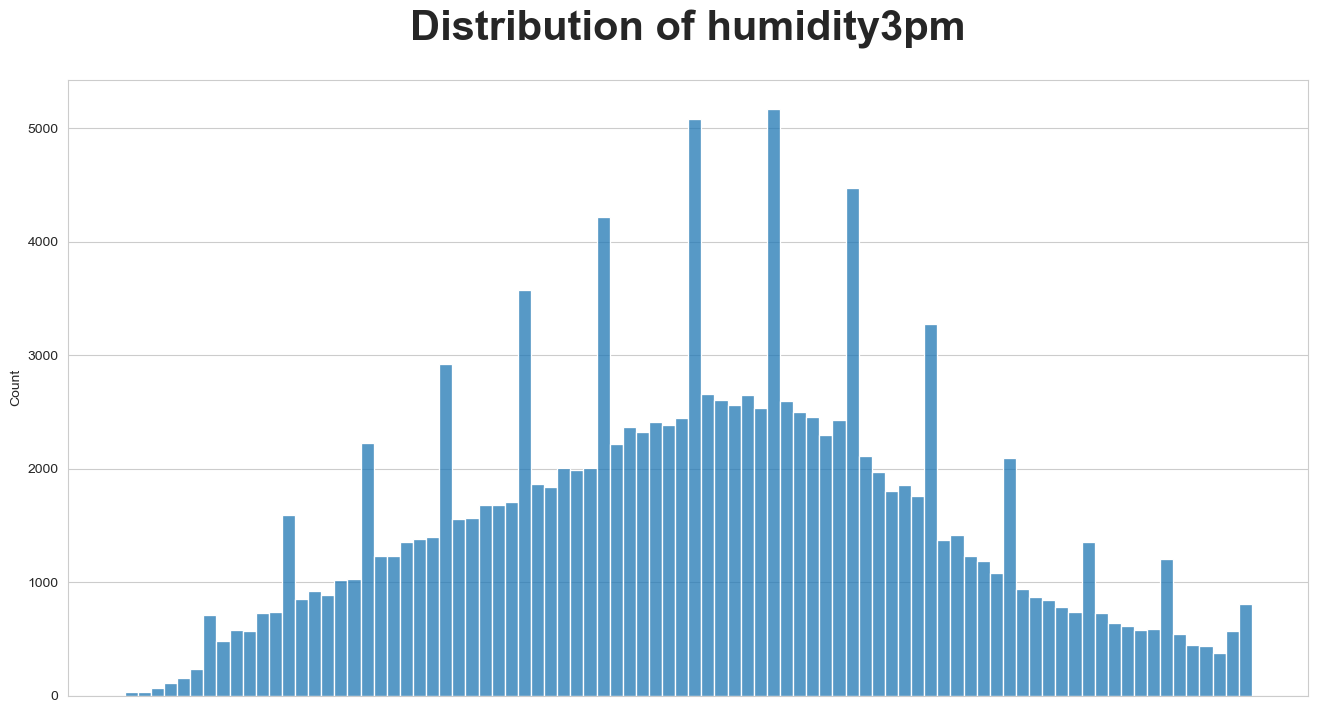

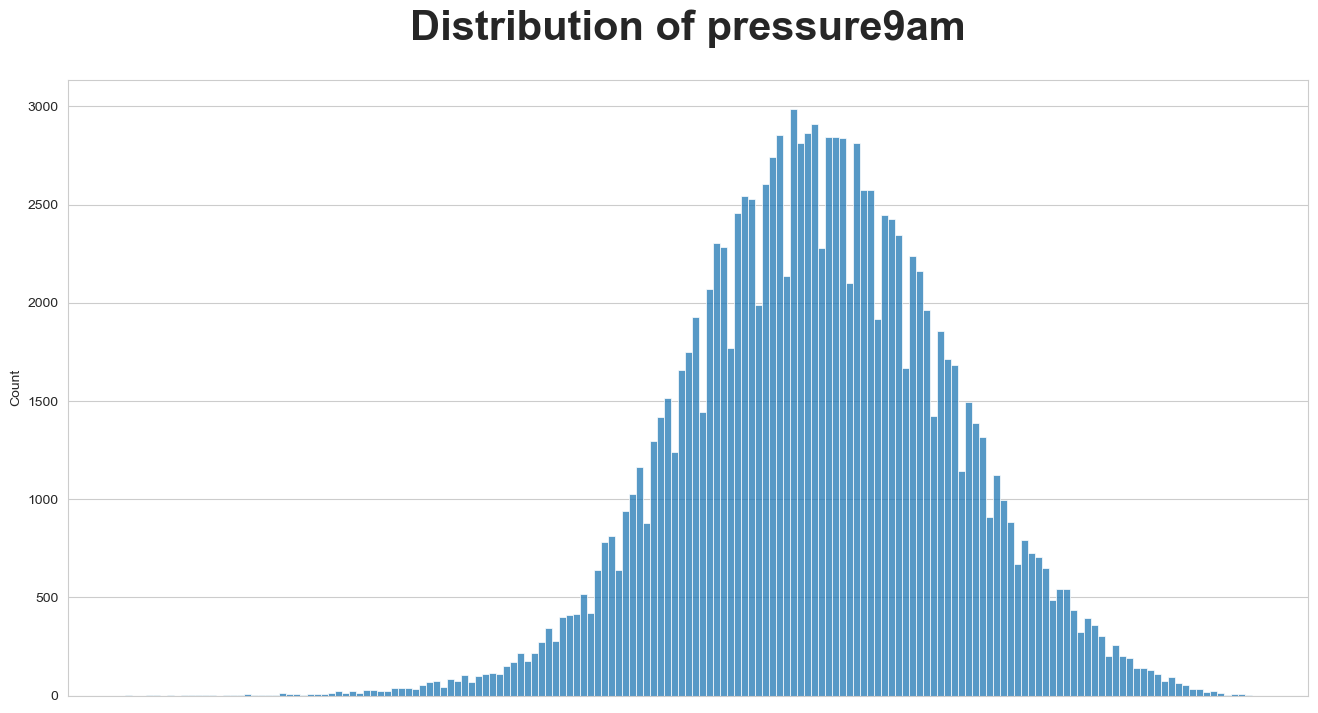

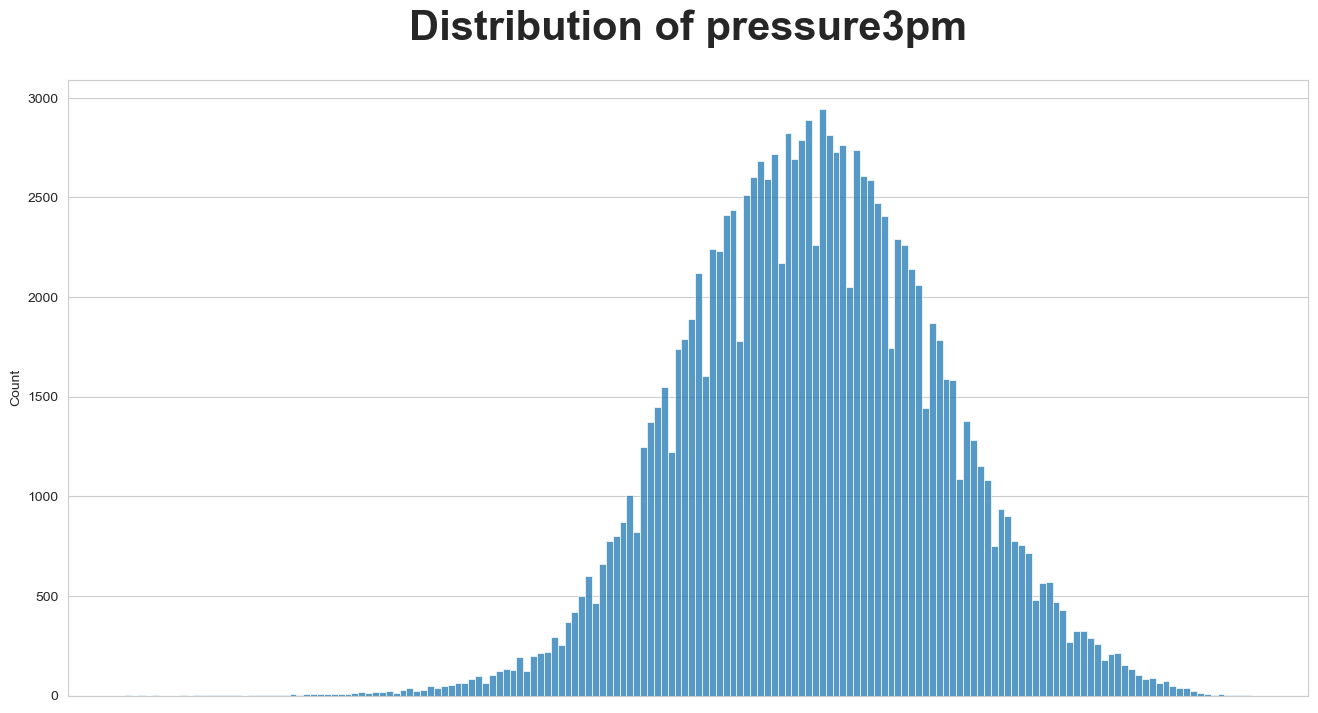

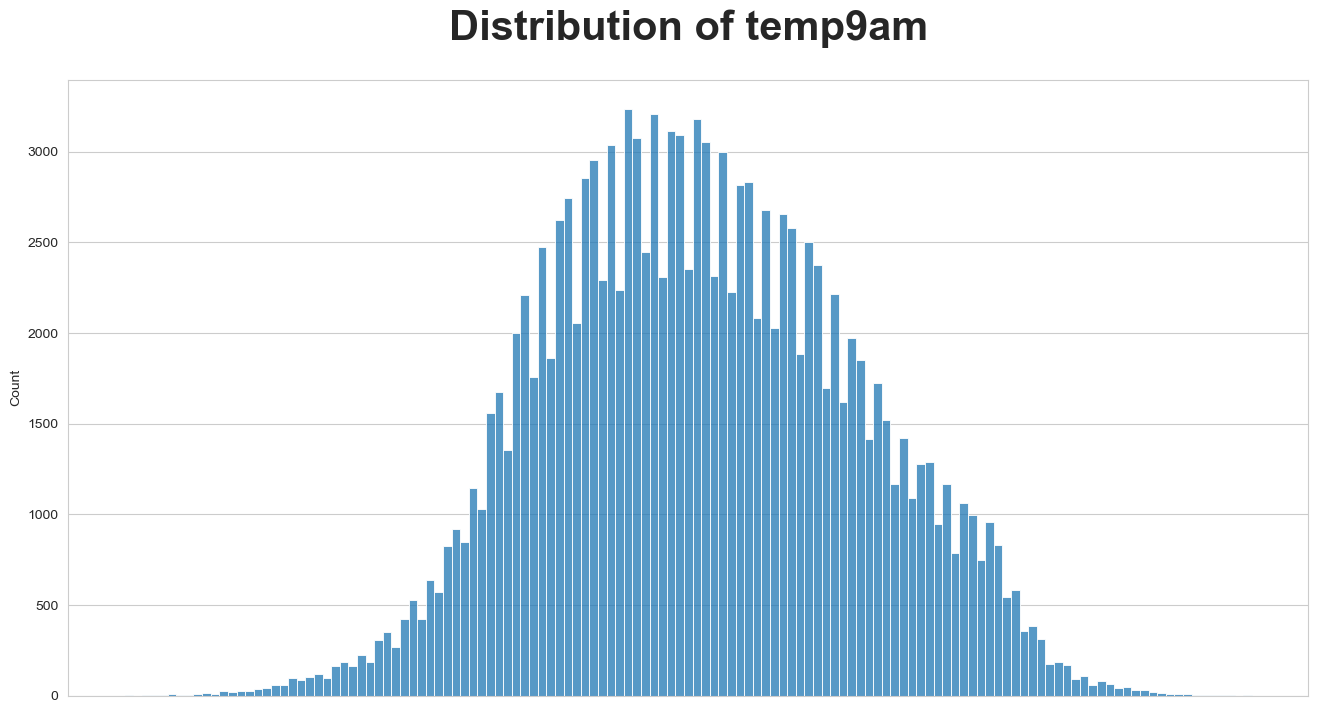

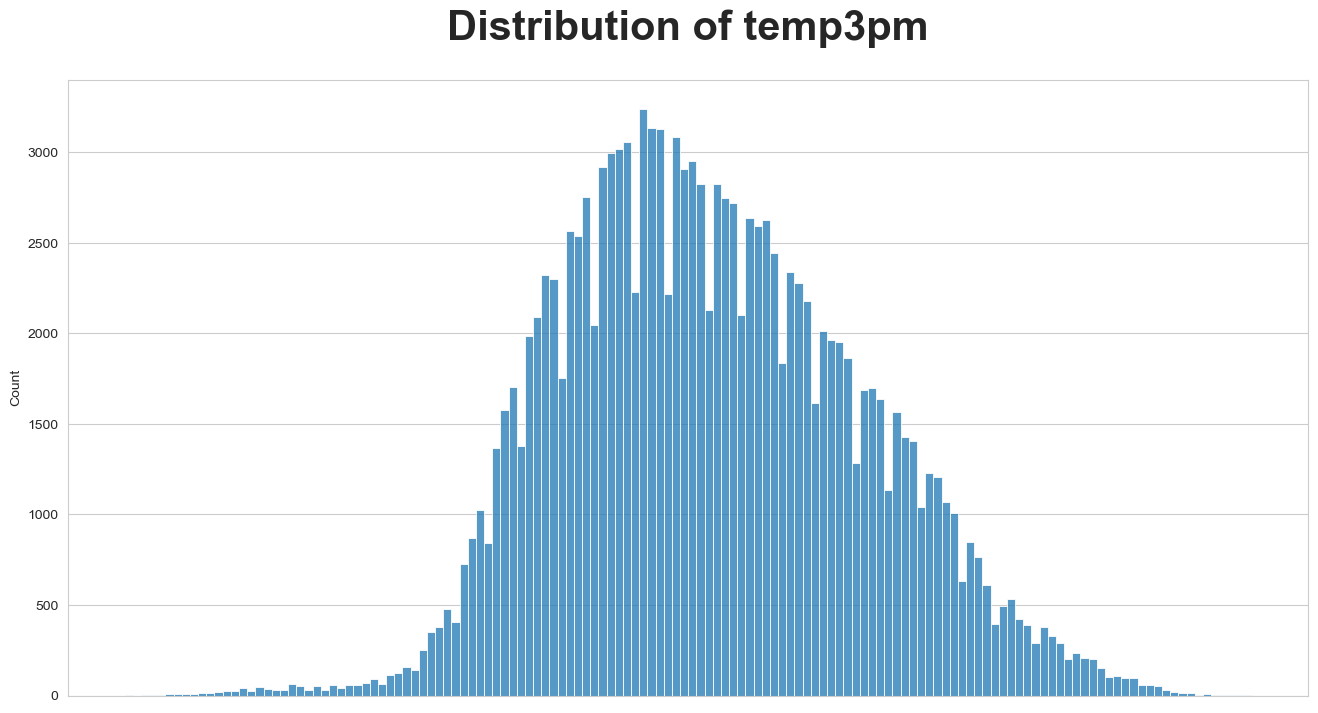

In [70]:
# Distribution of Numerical variables

for i in numeric:
    plt.figure(figsize=(16,8))
    plt.gca().axes.xaxis.set_visible(False)
    # plt.gca().axes.yaxis.set_visible(False)
    sns.set_style("whitegrid")
    plt.title(f'Distribution of {i}', fontsize=30, fontweight='bold', y=1.05,)
    sns.histplot(x= i, data= data_for_analysis.drop('date', axis= 1), palette="hls")
    plt.show()

1. With Numerical variables: The distribution nearly distributed as Gaussian, some having skewness. We will transform and use Standardization to make it in the same scale later.
2. With Categorical variables ('location', 'windgustdir', 'winddir9am', 'winddir3pm'): there values quite similar, do not have any feature with a bias inside.
- The number of raining today quite even with weather raining tomorrow. My intuition feels that if it rained today, high probability it will rain tomorrow. Shall we have a look at it?

              raintomorrow  raintoday
raintomorrow      1.000000   0.307452
raintoday         0.307452   1.000000


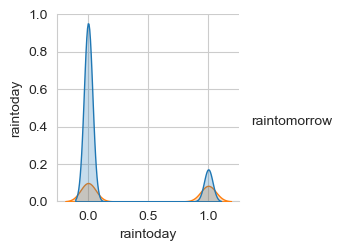

In [27]:
data_for_analysis['raintoday'] = [1 if i == 'Yes' else 0 for i in data_for_analysis['raintoday']]
sns.pairplot(data=data_for_analysis[['raintomorrow', 'raintoday']],
             hue= 'raintomorrow')
print(data_for_analysis[['raintomorrow', 'raintoday']].corr())
plt.show()

Haha, the data tells the opposite with my intuition.

There is a believe that month in a year (season) will be effect the rain.
<br>$\rightarrow$ Let's create a month column and see the correlation between month and raintomorrow

In [28]:
data_for_analysis['month'] = pd.to_datetime(data_for_analysis['date']).dt.month
data_for_analysis['month']

0         12
1         12
2         12
3         12
4         12
          ..
145454     6
145455     6
145456     6
145457     6
145458     6
Name: month, Length: 138075, dtype: int64

              raintomorrow     month
raintomorrow      1.000000  0.008153
month             0.008153  1.000000


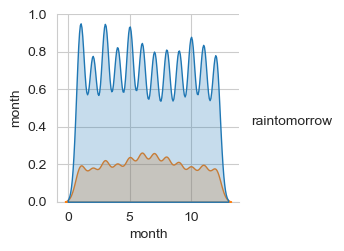

In [29]:
sns.pairplot(data=data_for_analysis[['raintomorrow', 'month']],
             hue= 'raintomorrow')
print(data_for_analysis[['raintomorrow', 'month']].corr())
plt.show()

<AxesSubplot: xlabel='month', ylabel='count'>

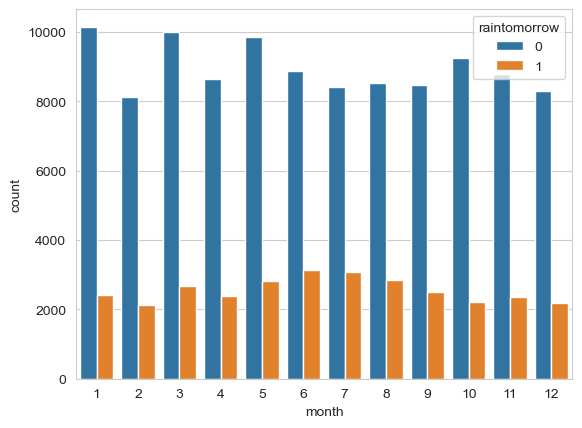

In [30]:
sns.countplot(data=data_for_analysis, x= 'month', hue= 'raintomorrow')

Seems like that believe is not right for Australia. Rain distribution across the year. But let's try to see the different in a model with 'month' feature.

In [31]:
# Add the month column to our dataset and drop the date column
data['month'] = pd.to_datetime(data['date']).dt.month
data = data.drop('date', axis= 1)

#### 2.3 Feature Engineering & Selection

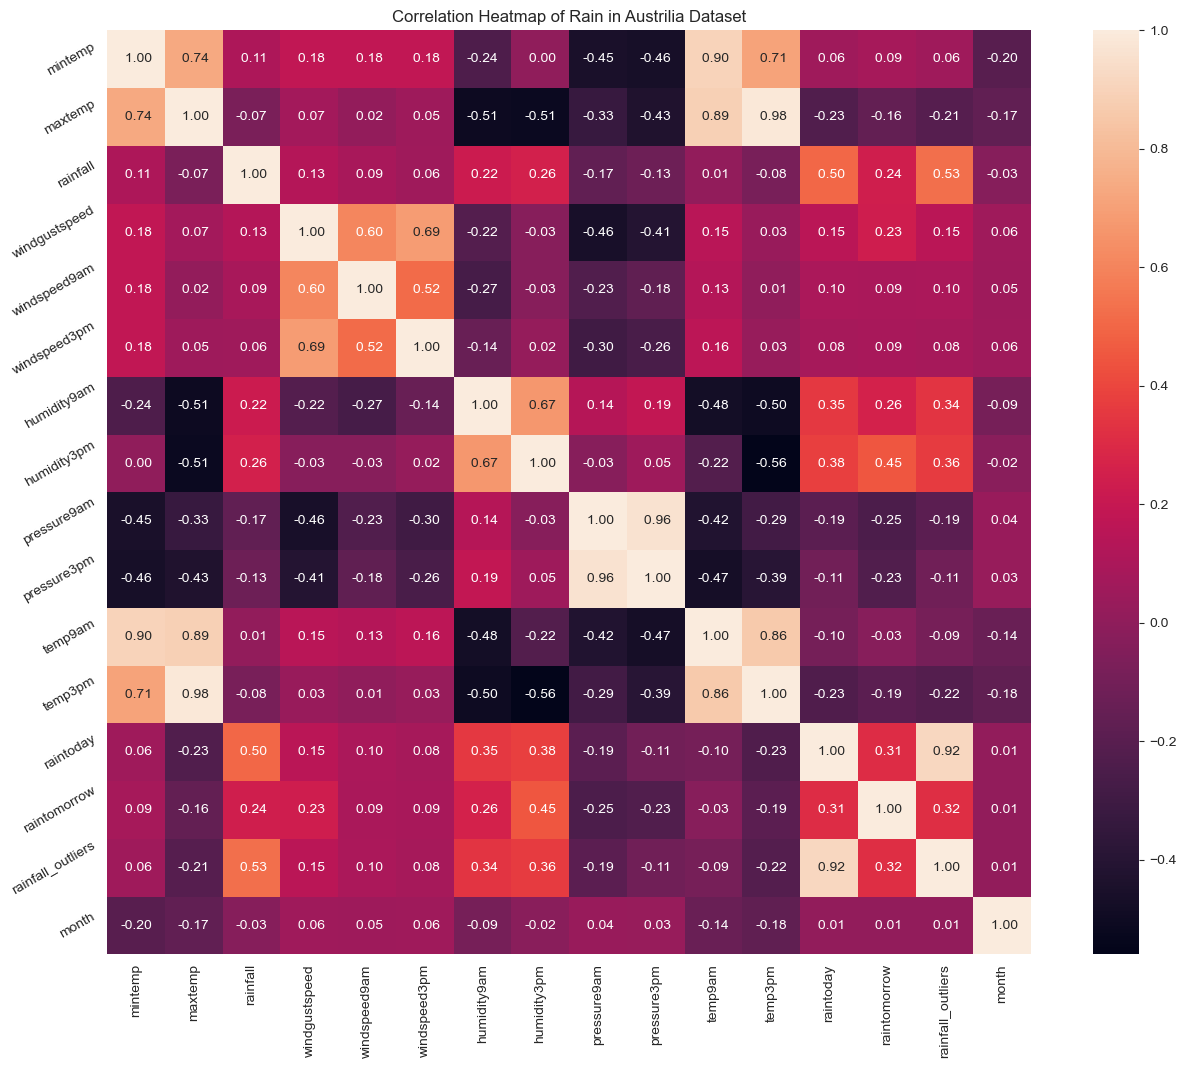

In [32]:
plt.figure(figsize= (16, 12))

plt.title('Correlation Heatmap of Rain in Austrilia Dataset')
ax = sns.heatmap(data_for_analysis.corr(), square= True, annot= True, fmt= ' .2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation= 30)

plt.show()

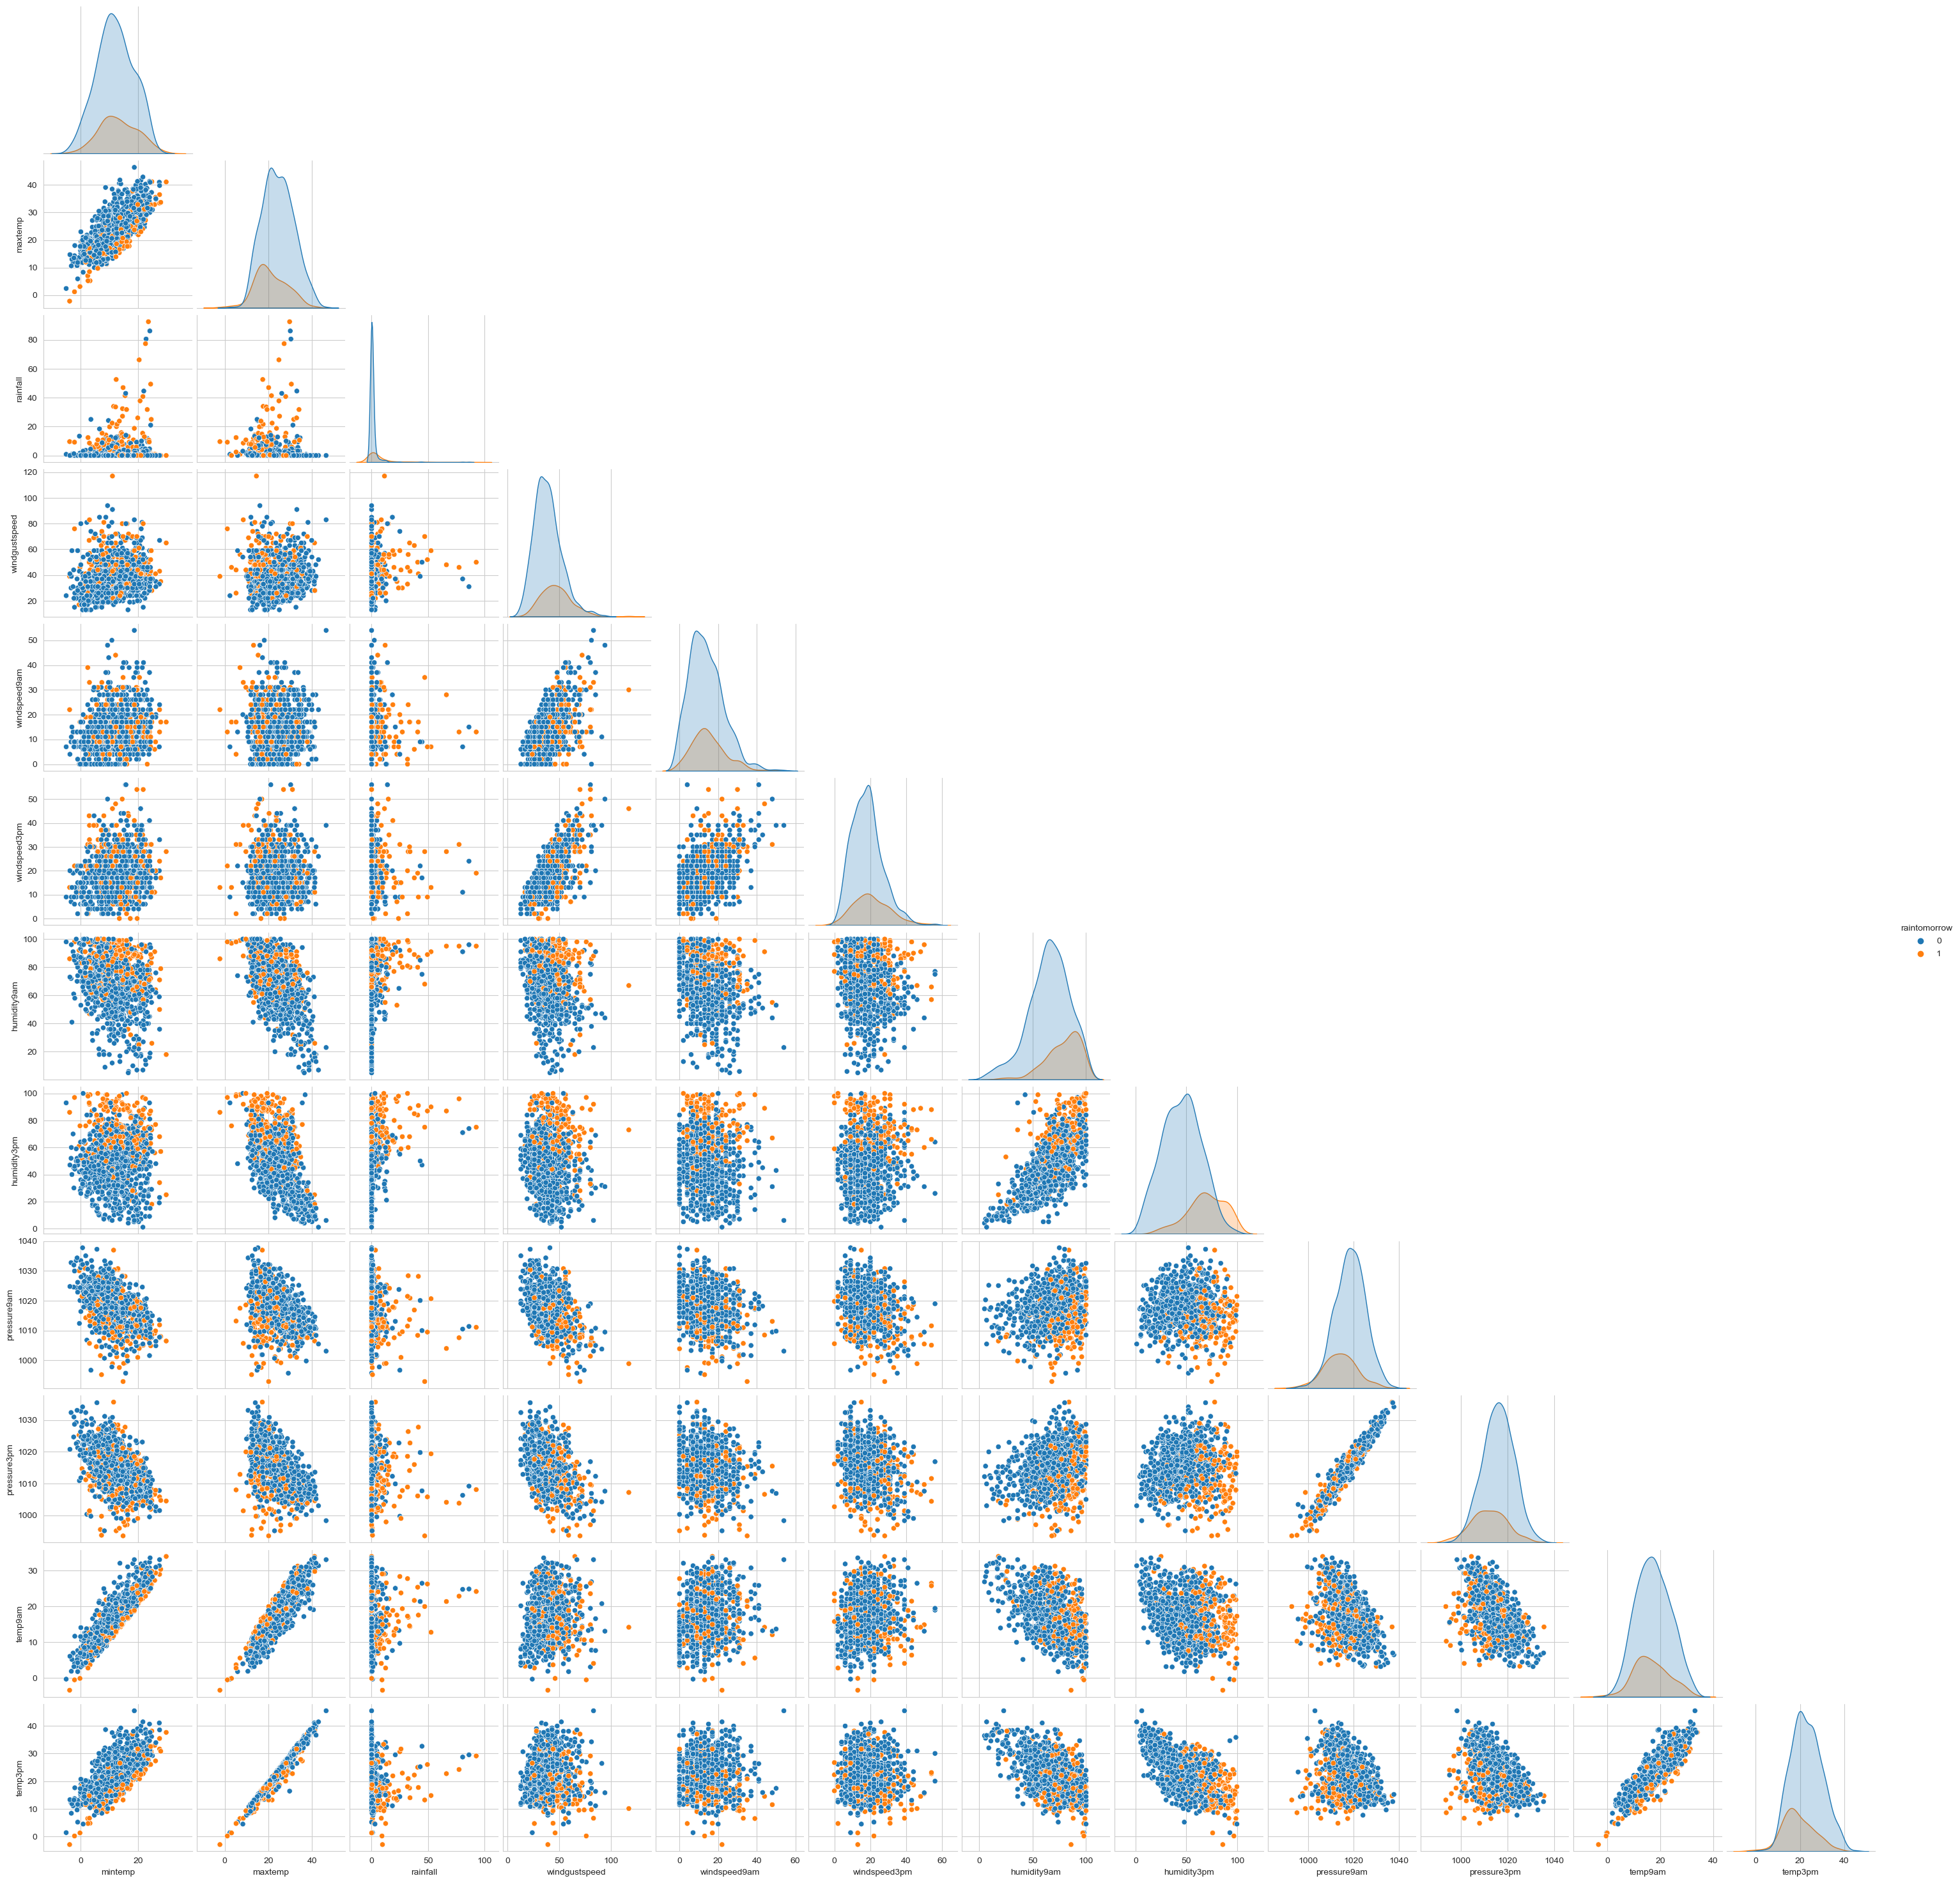

In [33]:
sns.pairplot(data=data_for_analysis[['mintemp',
                        'maxtemp',
                        'rainfall',
                        'windgustspeed',
                        'windspeed9am',
                        'windspeed3pm',
                        'humidity9am',
                        'humidity3pm',
                        'pressure9am',
                        'pressure3pm',
                        'temp9am',
                        'temp3pm',
                        'raintomorrow']].sample(n= 1000), # For faster performance, I only choose to pick 1000 samples from the dataset with more than 140k examples.
            hue= 'raintomorrow', corner= True)

1. Tempurature at 3pm seems like the max temp with 98% correlation
2. Also the pressure at 3pm vs 9am
-> Let's find out the real hidden pieces cause it looks like there a nearly strong linear relationship between those variables

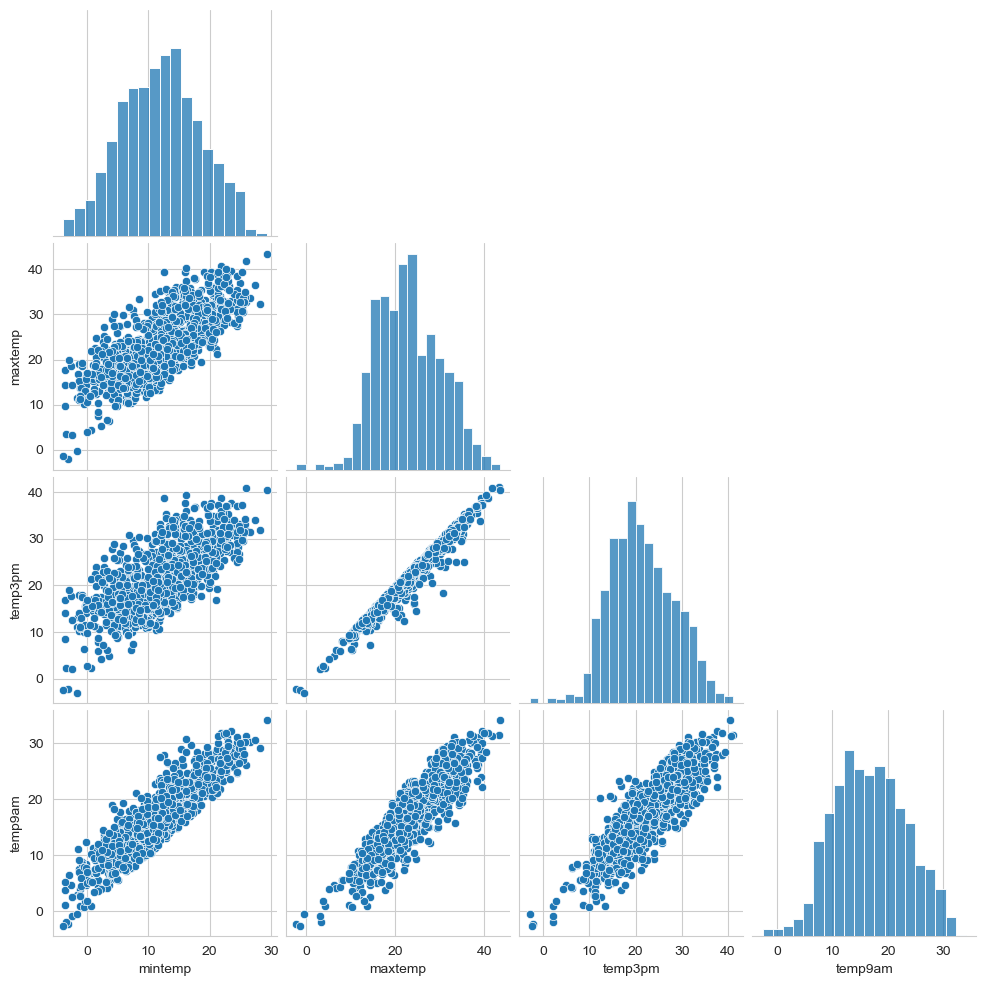

In [34]:
sns.pairplot(data=data[['mintemp', 'maxtemp', 'temp3pm', 'temp9am']].sample(n= 1000), corner= True)

# 3. MODELLING

## 3.1 Initial Model

In [35]:
# Create the data to fit to the model
input_var = data.drop(['raintomorrow'], axis= 1)
target_var = data['raintomorrow']

In [36]:
# Select columns by data type as we are going to use different transformer with different data type
num_col = make_column_selector(dtype_include= 'number')
cat_col = make_column_selector(dtype_exclude= 'number')

In [39]:
# Create our models
logreg = LogisticRegression()
dectree = DecisionTreeClassifier()
ranfor = RandomForestClassifier()

In [40]:
models = [logreg, dectree, ranfor]

In [41]:
## Create 2 pipelines with different transformer for Categorical variables and Numeric variables

# Pipeline for Numerical features using Simple Imputer to impute median values replace the missing values and then using Standard Scaler to Normalizing the data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler()),
])

# Pipeline for Categorical features using Simple Imputer to impute an 'Unknown' value to replace the missing values and then using One Hot Encoder to Encoding the data
cat_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy= 'constant', fill_value= 'Unknown')),
    ('ohe', OneHotEncoder(categories= 'auto', handle_unknown= 'ignore', sparse= False)),
])

# Choosing Columns and its transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)

In [42]:
for model in models:
    pipe = Pipeline([('pre', preprocessor), ('classifier', model)])
    
    print(cross_val_score(pipe, input_var, target_var, cv= 5, scoring= 'accuracy').mean())

0.7899981893898244
0.7453630273402136
0.8133695455368459


## 3.2 Hyperparameter Tuning

In [57]:
# Setting parameters for Logistic Regression
param_logreg = {}
param_logreg['classifier__penalty'] = ['l1', 'l2', 'elasticnet', 'none']
param_logreg['classifier__C'] = [0.1, 1, 10]
param_logreg['classifier__solver'] = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
param_logreg['classifier__max_iter'] = [100, 1000, 2500, 5000]
param_logreg['classifier'] = [logreg]

In [58]:
param_dectree = {}
param_dectree['classifier__max_depth'] = [10, 30, 50, 70, 90, 100]
param_dectree['classifier__criterion'] = ['gini', 'entropy']
param_dectree['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param_dectree['classifier__min_samples_split'] = [2, 4, 6]
param_dectree['classifier'] = [dectree]

In [59]:
param_ranfor = {}
param_ranfor['classifier__n_estimators'] = [int(x) for x in np.linspace(start= 5, stop= 50, num= 5)]
param_ranfor['classifier__max_features'] = ['auto', 'sqrt']
param_ranfor['classifier'] = [ranfor]

In [60]:
param = [param_logreg, param_dectree, param_ranfor]

In [61]:
pipe_logreg = Pipeline([('pre', preprocessor), ('classifier', logreg)])
# pipe_dectree = Pipeline([('pre', preprocessor), ('classifier', dectree)])
# pipe_ranfor = Pipeline([('pre', preprocessor), ('classifier', ranfor)])

In [62]:
grid = GridSearchCV(pipe_logreg, param)

In [63]:
grid.fit(input_var, target_var)

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd711582d00>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constan...
                                                 'liblinear', 'sag', 'saga']},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [10, 30, 50, 70, 90, 100],
                          'classifier__max_features': ['auto', 'sqrt', 'log2'],
                          'classifier__min_samples_split': [2, 4, 6]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': ['auto', 'sqrt'],
                          'classifier__n_estimators': [5, 16, 27, 38, 50]}])

In [64]:
grid.best_params_

{'classifier': LogisticRegression(C=0.1, solver='saga'),
 'classifier__C': 0.1,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

The result points out that Logistic Regression is the best solution. Let's compare its Accuracy score.

In [65]:
log = LogisticRegression(C= 0.1, solver= 'saga', max_iter= 100, penalty= 'l2')
dec = DecisionTreeClassifier(criterion= 'gini',max_depth= 10, max_features= 'sqrt', min_samples_split= 2)
ran = RandomForestClassifier(max_features='auto', n_estimators=27)

In [66]:
model_tuned = [log, dec, ran]

In [67]:
for model in model_tuned:
    pipe = Pipeline([('pre', preprocessor), ('classifier', model)])
    
    print(cross_val_score(pipe, input_var, target_var, cv= 5, scoring= 'accuracy').mean())

0.8151294586275574
0.8019699438710844
0.8065616512764802
